<a href="https://colab.research.google.com/github/fatemehes75/IBM-course-/blob/main/Database/Connect_to_Db2_database_on_Cloud_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Connect to Db2 database on Cloud using Python



##About dataset
The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal. This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on the city of Chicago's website, but to summarize, the dataset has the following variables:

* **Community Area Number (ca):** Used to uniquely identify each row of the dataset

* **Community Area Name (community_area_name):** The name of the region in the city of Chicago

* **Percent of Housing Crowded (percent_of_housing_crowded):** Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty (percent_households_below_poverty):** Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed (percent_aged_16_unemployed):** Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma (percent_aged_25_without_high_school_diploma):** Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under 18 or Over 64:**Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents)

* **Per Capita Income (per_capita_income_):** Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index (hardship_index):** Score that incorporates each of the six selected socioeconomic indicators

In [ ]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

In [ ]:
import ibm_db

In [ ]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud"
dsn_uid = "gkp84892"        # e.g. "abc12345"
dsn_pwd = "n8zrD0v46C6G0WJD"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "32536"                # e.g. "32733"
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

## Create the DB2 database connection



In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud;PORT=32536;PROTOCOL=TCPIP;UID=gkp84892;PWD=n8zrD0v46C6G0WJD;SECURITY=SSL;


Now establish the connection to the database


In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  bludb as user:  gkp84892 on host:  764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


In [ ]:
stmt = ibm_db.exec_immediate(conn,'SELECT COUNT(*) FROM CHICAGO')
ibm_db.fetch_both(stmt)

{'1': 78, 0: 78}

In [ ]:
import pandas as pd
import ibm_db_dbi
pconn = ibm_db_dbi.Connection(conn)
df = pd.read_sql('SELECT * FROM CHICAGO',pconn)
df

<ipython-input-16-f92fa3c76f9b>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM CHICAGO',pconn)


,CA,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [ ]:
df.describe()

,CA,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX
count,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,39.000000,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.371857,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,39.000000,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,58.000000,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [ ]:
df.shape[0] #rows

78

How many community areas in Chicago have a hardship index greater than 50.0?

In [ ]:
pd.read_sql('SELECT COUNT(*) FROM CHICAGO WHERE hardship_index > 50.0',pconn)

<ipython-input-32-ac28bdad3b25>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('SELECT COUNT(*) FROM CHICAGO WHERE hardship_index > 50.0',pconn)


,1
0,38


What is the maximum value of hardship index in this dataset?

In [ ]:
pd.read_sql('SELECT MAX(hardship_index) FROM chicago',pconn)

<ipython-input-34-b9998441354e>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('SELECT MAX(hardship_index) FROM chicago',pconn)


,1
0,98


Which community area which has the highest hardship index?

In [ ]:
pd.read_sql('select community_area_name from chicago where hardship_index = ( select max(hardship_index) from chicago)', pconn)

<ipython-input-37-5e7049dc3fe3>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('select community_area_name from chicago where hardship_index = ( select max(hardship_index) from chicago)', pconn)


,COMMUNITY_AREA_NAME
0,Riverdale


Which Chicago community areas have per-capita incomes greater than $60,000?

In [ ]:
pd.read_sql('SELECT community_area_name FROM chicago WHERE per_capita_income_ > 60000;',pconn)

<ipython-input-39-70e92d473a12>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('SELECT community_area_name FROM chicago WHERE per_capita_income_ > 60000;',pconn)


,COMMUNITY_AREA_NAME
0,Lake View
1,Lincoln Park
2,Near North Side
3,Loop


Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

In [ ]:
income_vs_hardship = pd.read_sql('SELECT per_capita_income_, hardship_index FROM chicago', pconn)
income_vs_hardship

<ipython-input-45-00899b55a329>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  income_vs_hardship = pd.read_sql('SELECT per_capita_income_, hardship_index FROM chicago', pconn)


,PER_CAPITA_INCOME_,HARDSHIP_INDEX
0,23939,39.0
1,23040,46.0
2,35787,20.0
3,37524,17.0
4,57123,6.0
...,...,...
73,34381,16.0
74,27149,30.0
75,25828,24.0
76,33385,19.0


In [ ]:
print(income_vs_hardship.columns)

Index(['PER_CAPITA_INCOME_', 'HARDSHIP_INDEX'], dtype='object')


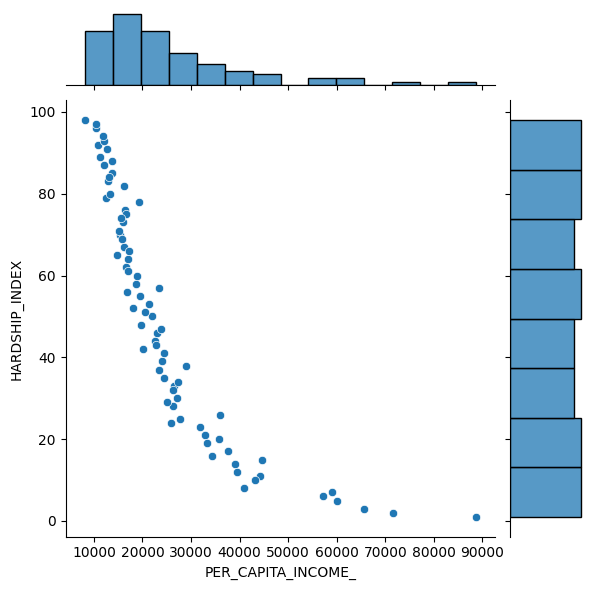

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plot = sns.jointplot(x='PER_CAPITA_INCOME_',y='HARDSHIP_INDEX', data=income_vs_hardship)

In [ ]:
ibm_db.close(conn)